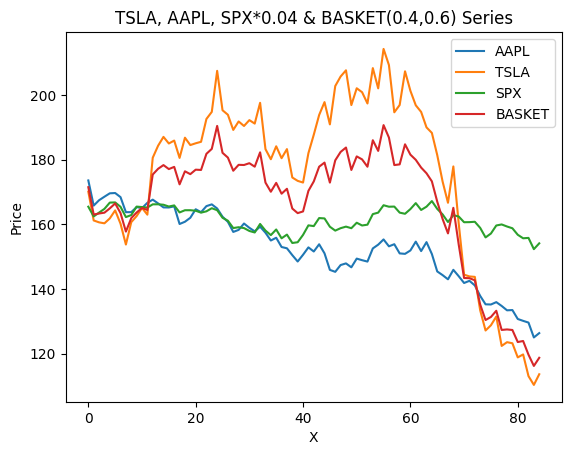

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from underlyings.stock import Stock
from underlyings.index import Index
from underlyings.basket import Basket

from datetime import datetime


w = 0.04
w1 = 0.4
w2 = 0.6

spx = Index("SPX")
apple = Stock('AAPL')
tsla = Stock("TSLA")
bs = Basket(["AAPL","TSLA"], [w1, w2])

start_date =  pd.to_datetime('2023-01-04')
end_date = datetime.today().strftime('%Y-%m-%d')

df_apple = apple.get_quotes(start_date, end_date)
df_tsla = tsla.get_quotes(start_date, end_date)
df_spx = spx.get_quotes(start_date, end_date).apply(lambda x: x * w)
df_bs = bs.get_quotes(start_date,end_date)


plt.plot(df_apple, label='AAPL')
plt.plot(df_tsla, label='TSLA')
plt.plot(df_spx, label='SPX')
plt.plot(df_bs, label='BASKET')

# Setting the title and labels
plt.title(f'TSLA, AAPL, SPX*{w} & BASKET({w1},{w2}) Series')
plt.xlabel('X')
plt.ylabel('Price')

# Adding the legend
plt.legend()
